# Vizualizaing the History of the Nobel Prize Winners

## Project origin and skills focus
This is one of several short projects I completed on [Data Camp](https://www.datacamp.com) and uploaded here to showcase my work.  They supplied the subject, dataset and some questions.  I supplied the data processing, analysis, and conclusions.  This project is focused on cleaning and filtering data, as well as performing exploratory data analysis in Python.   

## Topic Background
The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

## Analysis Questions 
1. What is the most commonly awarded gender and birth country? 
2. Store your answers as string variables top_gender and top_country. 
3. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories? Store this as an integer called max_decade_usa. 
4. Which decade and Nobel Prize category combination had the highest proportion of female laureates?  Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair. 
5. Who was the first woman to receive a Nobel Prize, and in what category?  Save your string answers as first_woman_name and first_woman_category. 
6. Which individuals or organizations have won more than one Nobel Prize throughout the years?  Store the full names in a list named repeat_list.

### Q1: Which gender has received more Nobel Prizes?

In [3]:
#Q1 Step 1: Load libraries and read in the data, and look at the first rows of the dataframe.
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import sys

df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
#Q1 Step 2:** Look at the value counts for both genders
df['sex'].value_counts()

sex
Male      905
Female     65
Name: count, dtype: int64

### Q1 Answer: Almost 10 times as many men have been awarded the Nobel Prize as women.

In [5]:
# assign answer to variable for project check
top_gender = "Male"

### Q2: What country has won the most Nobel prizes? 

In [6]:
#Look at the head of the value counts of birth country to find the countries with the most winners
df['birth_country'].value_counts().head()

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: count, dtype: int64

### Q2 Answer:  The US has won more Nobel Prizes than any other country; in fact, over 3 times more than any other country.

In [7]:
# assign answer to variable for project check
top_country = "United States of America"

### Q3: In what decade did the US have the highest proportion of the Nobel Prizes awarded for the given decade? 


In [8]:
# Q3 Step 1: filter the birth country data for US winners, basically making a column that says if the person/organization was from the US (True/False).
df['usa_born'] = df['birth_country']=='United States of America'
df['usa_born'].value_counts()

usa_born
False    709
True     291
Name: count, dtype: int64

**Note: Looks like the US has won nearly 30% of the awards ever given (291 of 991).**

In [9]:
# Q3 Step 2: Use rounding on the 'year' column data to get the decade for each row
df['decade'] = df['year'].round(-1)
df['decade'].value_counts().sort_index()

decade
1900     31
1910     51
1920     45
1930     51
1940     46
1950     62
1960     84
1970     81
1980    109
1990     90
2000    133
2010    106
2020    111
Name: count, dtype: int64

In [10]:
# Q3 Step 3: use '.groupby()' to sum the US-born winners for each decade
us_per_decade = df.groupby("decade")["usa_born"].sum()
print(us_per_decade.sort_index())


decade
1900     0
1910     3
1920     3
1930    11
1940     9
1950    21
1960    21
1970    22
1980    38
1990    34
2000    55
2010    40
2020    34
Name: usa_born, dtype: int64


In [11]:
# Q3 Step 4: get the number of records in each decade.
total_per_decade = df["decade"].value_counts()
print(total_per_decade.sort_index())

decade
1900     31
1910     51
1920     45
1930     51
1940     46
1950     62
1960     84
1970     81
1980    109
1990     90
2000    133
2010    106
2020    111
Name: count, dtype: int64



 Decade with highest ratio of US winners:  2000


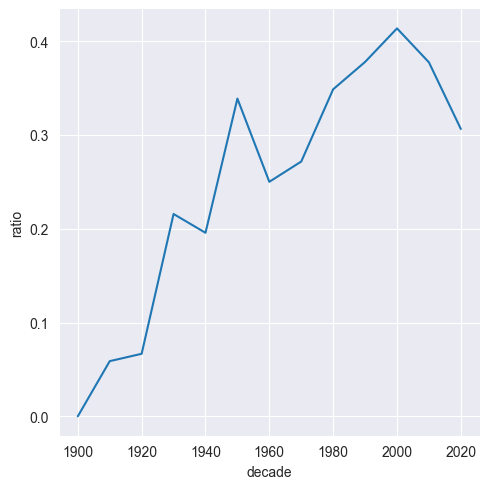

In [12]:
# Q3 Step 5: calc the ratio of US to World awards for each decade, reset the index so the decade info becomes a column that can be easily used in the plot. Name the columns.  Make a line plot. Save the highest ratio in the chart as a variable (max_decade_usa).
us_per_decade_ratio = us_per_decade / total_per_decade
us_per_decade_ratio = us_per_decade_ratio.reset_index()
us_per_decade_ratio.columns = ["decade", "ratio"]
sns.set_style("darkgrid")
sns.relplot(x='decade', y='ratio', data=us_per_decade_ratio, kind="line")
max_decade_usa = 2000
print(f'\n Decade with highest ratio of US winners:  {max_decade_usa}')

### Q3 Answer: The 2000s had the highest proportion of US winners.

### Q4 Which decade and Nobel Prize category combination had the highest proportion of female laureates? 

In [13]:
# Q4 Step 1: Filter the gender m/f column to get a boolean column of T/F female. Get value counts
df['female'] = df['sex']=='Female'
df['female'].value_counts()

female
False    935
True      65
Name: count, dtype: int64

In [14]:
# Let's also see which decade had the most female winners.
df.groupby("decade")["female"].sum().sort_index(ascending=False)

decade
2020    18
2010    13
2000     7
1990     6
1980     6
1970     1
1960     2
1950     2
1940     3
1930     3
1920     0
1910     2
1900     2
Name: female, dtype: int64

In [15]:
# Q4 Step 2: Groupby decade and prize category, summing by female boolean column (count of female=True).
f_per_decade = df.groupby(["decade","category"])["female"].sum()
print(f_per_decade.head(15))

decade  category  
1900    Chemistry     0
        Literature    0
        Medicine      0
        Peace         1
        Physics       1
1910    Chemistry     1
        Literature    1
        Medicine      0
        Peace         0
        Physics       0
1920    Chemistry     0
        Literature    0
        Medicine      0
        Peace         0
        Physics       0
Name: female, dtype: int64


In [16]:
# Q4 Step 3: Groupby decade and category, counting both genders
total_per_decade_and_cat = df.groupby(["decade","category"])["sex"].count()
print(total_per_decade_and_cat.head(15))

decade  category  
1900    Chemistry      5
        Literature     6
        Medicine       5
        Peace          6
        Physics        8
1910    Chemistry     10
        Literature     8
        Medicine      11
        Peace         11
        Physics       10
1920    Chemistry      7
        Literature    11
        Medicine       7
        Peace          7
        Physics       12
Name: sex, dtype: int64


In [17]:
# Q4 Step 4: calculate the ratio of the two arrays.  Reset the index. Sort and look at highest ratio decade.
f_per_decade_ratio = f_per_decade / total_per_decade_and_cat
#print(f_per_decade_ratio.sort_values(ascending=False).head())
f_per_decade_ratio = f_per_decade_ratio.reset_index()
f_per_decade_ratio.columns = ["decade", "category","ratio"]
print(f_per_decade_ratio.sort_values(by="ratio",ascending=False).head())

    decade    category     ratio
67    2020  Literature  0.444444
63    2010       Peace  0.400000
69    2020       Peace  0.375000
45    1980       Peace  0.363636
61    2010  Literature  0.333333


/Users/jfs-m3/jfs_env_2025_1/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


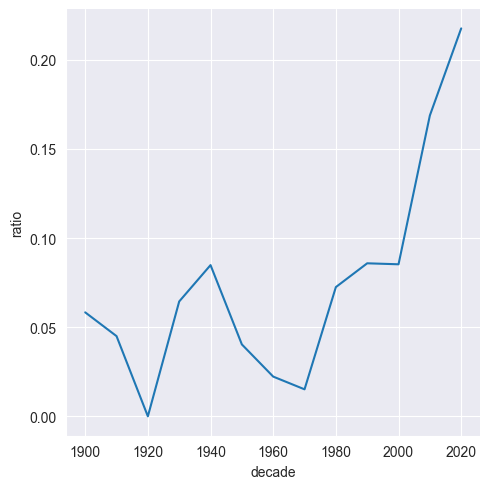

In [18]:
# Q4 Step 5: Plot the ratio by decade
sns.set_style("darkgrid")
sns.relplot(x='decade', y='ratio', data=f_per_decade_ratio, kind="line",ci=None)
max_female_dict = {2020:"Literature"}

### Q4 Answer: The decade with highest ratio of female winners is the 2020s and the category was Literature.  Although the proportion of female winners has more than doubled since 2000, it is still only around 25% of the winners.

### Q5: Who was the first woman to receive a Nobel Prize, and in what category? Save string answers as first_woman_name and first_woman_category.

In [19]:
f_winners = df[df['sex']=='Female'].sort_values("year",ascending=True)
first_woman_name = f_winners['full_name'].values[0]
print(first_woman_name)
first_woman_category = f_winners['category'].values[0]
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


### Q5 Answer: Marie Curie

In [24]:
win_counts = df['full_name'].value_counts().sort_values(ascending=False)
repeat_list = []
for val in win_counts.index:
    if win_counts[val] > 1:
        repeat_list.append(val)


### Q6: Which individuals or organizations have won more than one Nobel Prize throughout the years?  Store the full names in a list named repeat_list.

### Q6 Answer: See list below, including Marie Curie!

In [27]:
for item in repeat_list:
    print(item)

Comité international de la Croix Rouge (International Committee of the Red Cross)
John Bardeen
Frederick Sanger
Marie Curie, née Sklodowska
Office of the United Nations High Commissioner for Refugees (UNHCR)
Linus Carl Pauling
